## Import Libraries & Data

> **Libraries** <br>
>> `MatPlotLib` as `plt` <br>
>> `pandas` as `pd`<br>
>> `seaborn` as `sns` <br>

> **Data** <br>
>> `seth_environmentalGenusCountsegc_d_nov2024` as `segc_d` <br>
>> `seth_genusCountsegc_d_june2024` as `sgc_d` <br>
>> `seth_environmentalsegc_d_march2023` as `se_d` <br>
>> `envsegc_d10-DayTimeSeries_18f` as `e10d_d` <br>
>> `seth_ecoRegionsegc_d` as `ser_d` <br>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# === Load segc_d ===
segc_d = pd.read_csv('../data/seth_environmentalGenusCountData_nov2024.csv')

sgc_d = pd.read_csv('../data/seth_genusCountData_june2024.csv')

se_d = pd.read_csv('../data/seth_environmentalData_march2023.csv')

e10d_d = pd.read_csv('../data/envData10-DayTimeSeries_18f.csv')

ser_d = pd.read_csv('../data/seth_ecoRegionData.csv')

# === Put all DataFrames in a list for batch processing ===
datasets = [segc_d, sgc_d, se_d, e10d_d, ser_d]

# === Clean all column names ===
for df in datasets:
    df.columns = (
        df.columns
        .str.strip()                 # remove leading/trailing spaces
        .str.replace(' ', '_')       # replace internal spaces with underscores
        .str.replace('\n', '', regex=False)  # remove newlines
    )

## Sight Attributes Correlation to Total Fish and Total Genus <br> (Correlation Heat Map)
> **Script:** `sightAtt_CorrHeatMap.py` <br>
> **Figure:** `sightAtt_CorrHeatMap.png` <br>

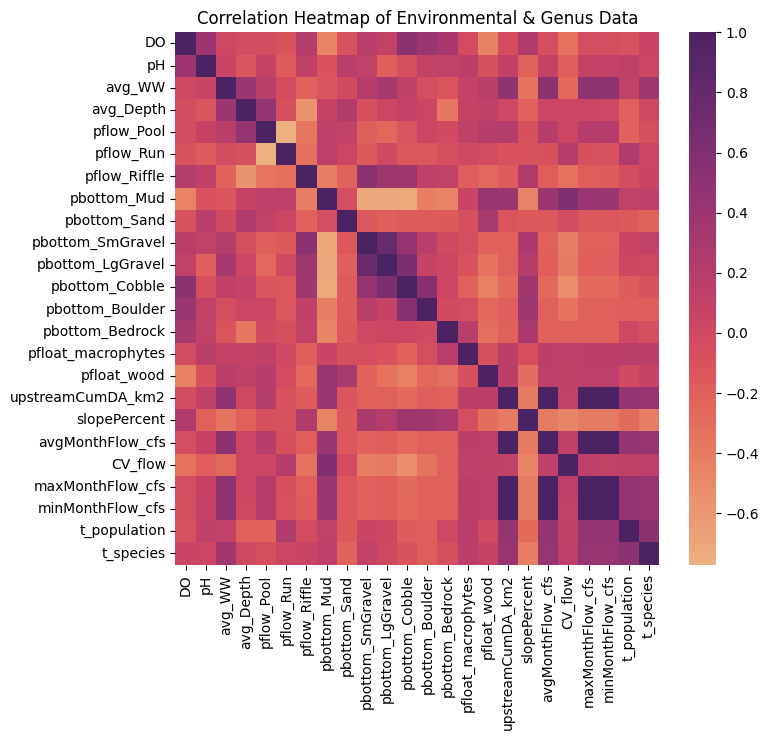

✅ Heatmap saved to figures/correlation_heatmap.png


In [2]:
seps_d = segc_d.drop(columns=['SiteN','State','Lat','Long', 'Ameiurus','Aphredoderus','Aplodinotus','Campostoma','Cyprinella','Cyprinus','Dorosoma','Ellasoma','Erimyzon','Esox','Etheostoma','Fundulus','Gambusia','Ictalurus','Labidesthes','Lepisosteus','Lepomis','Lythrus','Macrohybopsis','Micropterus','Minytrema','Moxostoma','Nototropis','Notemigonus','Notropis','Noturus','Percina','Phenocobius','Pimephales','Semotilus'])

# === Compute correlation matrix ===
c_m = seps_d.corr(numeric_only=True)

# === Ensure output folder exists ===
os.makedirs("../figures", exist_ok=True)

# === Plot and save ===
plt.figure(figsize=(8, 7.5))
sns.heatmap(c_m, cmap="flare", annot=False)
plt.title("Correlation Heatmap of Environmental & Genus Data")

plt.tight_layout()

# Save the figure
#plt.savefig("../figures/correlation_heatmap.png", dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

plt.close()  # ensures the figure is finalized and file is written

print("✅ Heatmap saved to figures/correlation_heatmap.png")

## Most Correlated Sight Attributes, Corr vs Sights (Line Plot)
> **Script:** `attributes_corrVsSightN_linePlot.py` <br>
> **Figure:** `attributes_corrVsSightN_linePlot.png` <br>

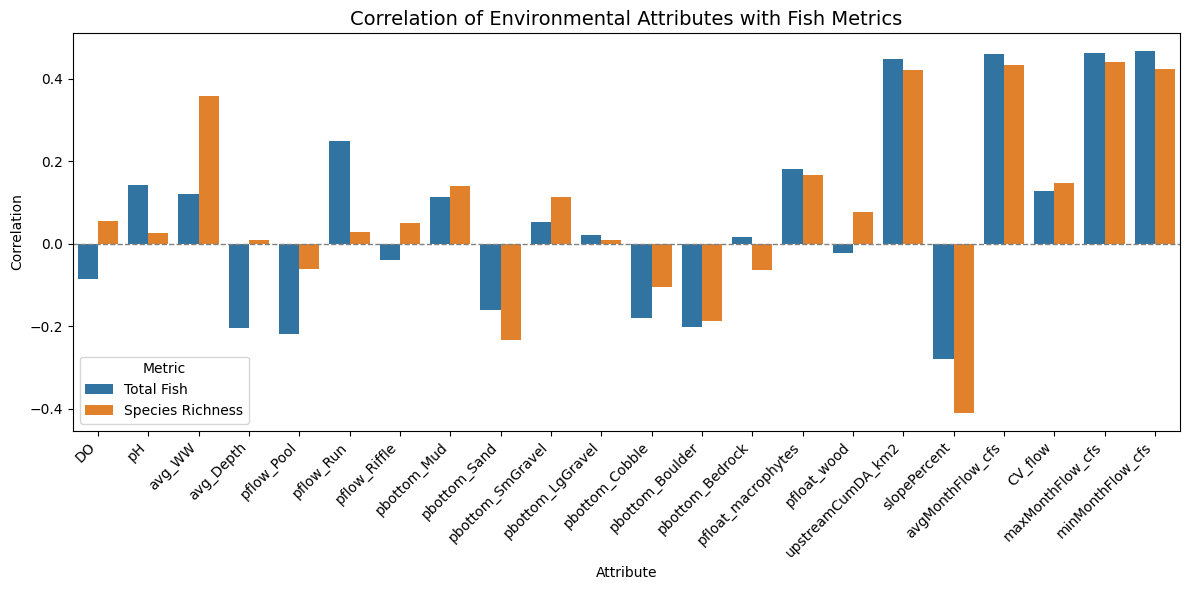

In [3]:
# Select environmental columns
env_cols = [
    'DO', 'pH', 'avg_WW', 'avg_Depth', 'pflow_Pool', 'pflow_Run', 'pflow_Riffle',
    'pbottom_Mud', 'pbottom_Sand', 'pbottom_SmGravel', 'pbottom_LgGravel',
    'pbottom_Cobble', 'pbottom_Boulder', 'pbottom_Bedrock',
    'pfloat_macrophytes', 'pfloat_wood', 'upstreamCumDA_km2',
    'slopePercent', 'avgMonthFlow_cfs', 'CV_flow', 'maxMonthFlow_cfs', 'minMonthFlow_cfs'
]

# Correlation with total fish and richness
corr_total = segc_d[env_cols + ['t_population']].corr()['t_population'][env_cols]
corr_rich = segc_d[env_cols + ['t_species']].corr()['t_species'][env_cols]

corr_segc_d = pd.DataFrame({
    'Attribute': env_cols,
    'Total Fish': corr_total.values,
    'Species Richness': corr_rich.values
}).melt(id_vars='Attribute', var_name='Metric', value_name='Correlation')

plt.figure(figsize=(12, 6))
sns.barplot(data=corr_segc_d, x='Attribute', y='Correlation', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Environmental Attributes with Fish Metrics', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.tight_layout()
plt.show()